In [105]:
#!pip install yfinance
#!pip install scipy
#!pip install sklearn

In [4]:
import yfinance as yf
import pandas as pd
from datetime import date

In [56]:
#set start and end date
start_date = '2021-01-01'
end_date = date.today().strftime('%Y-%m-%d')

#set tickers
tickers_list = ['AMZN','AAPL','TSLA','MSFT','NVDA','KO','JNJ','GOOGL','SPY','GME','JPM','PYPL']

In [57]:
#get data
data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
data['ordinal'] = data.index.map(pd.Timestamp.toordinal)
data

,AMZN,AAPL,TSLA,MSFT,NVDA,KO,JNJ,GOOGL,SPY,GME,JPM,PYPL,ordinal
Date,,,,,,,,,,,,,
2021-01-04,3186.629883,128.617111,729.770020,215.880432,131.020569,51.147514,152.652878,1726.130005,363.936462,17.250000,122.786552,231.919998,737794
2021-01-05,3218.510010,130.207291,735.109985,216.088669,133.930527,50.585239,154.447647,1740.050049,366.442993,17.370001,123.454666,234.910004,737795
2021-01-06,3138.379883,125.824318,755.979980,210.485626,126.034920,48.975979,155.901031,1722.880005,368.633820,18.360001,129.251587,226.830002,737796
2021-01-07,3162.159912,130.117859,816.039978,216.475433,133.323547,48.433086,156.427734,1774.339966,374.110779,18.080000,133.496109,235.039993,737797
2021-01-08,3182.699951,131.240906,880.020020,217.794373,132.651642,49.518860,156.105850,1797.829956,376.242340,17.690001,133.643509,242.460007,737798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-15,3466.300049,179.300003,975.989990,334.649994,304.589996,58.060001,171.139999,2928.820068,468.949463,148.589996,157.940002,190.660004,738139
2021-12-16,3377.419922,172.259995,926.919983,324.899994,283.869995,58.650002,173.009995,2888.899902,464.814026,144.589996,160.410004,188.750000,738140
2021-12-17,3400.350098,171.139999,932.570007,323.799988,278.010010,57.730000,168.229996,2834.500000,459.869995,155.639999,156.759995,186.199997,738141


In [78]:
#Select ticker to plot

valid_input = False

while valid_input == False:
    selected_ticker = input('Please Choose a Ticker: ')
    if tickers_list.count(selected_ticker) > 0:
        valid_input = True
        df = data[selected_ticker]
        print('Stock to plot: %s' %df.name)
    else:
        print('Invalid Ticker, Please Choose Another')


Please Choose a Ticker: JPM
Stock to plot: JPM


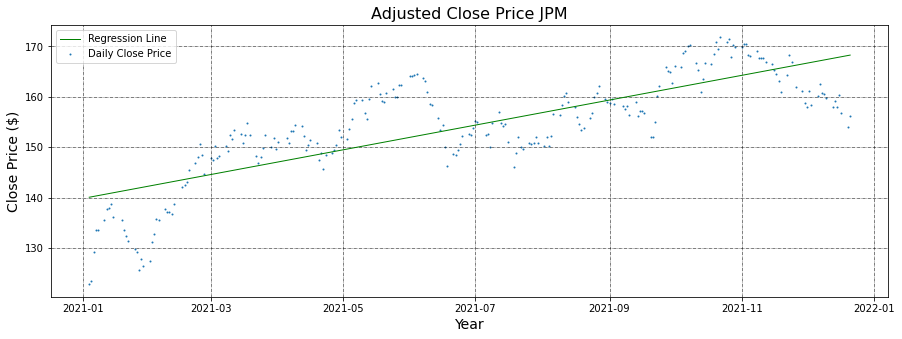

y1:  140.0775072797187
y2:  168.26218219392467
% change:  20.12 %


In [79]:
import matplotlib.pyplot as plt
import numpy as np

xr = data['ordinal']
x = df.index
y = df

#regression line
m, c = np.polyfit(xr,y,1)
yr = m*xr+c
y1 = m*xr[0]+c
y2 = m*xr[-1]+c

#red line if negative trend, green if positive, purple if flat
if y2<y1:
    reg_color = 'r'
elif y2>y1:
    reg_color = 'g'
elif y2==y1:
    reg_color = 'purple'

#define plot parameters
plt.rcParams["figure.figsize"] = (15,5)
plt.title("Adjusted Close Price %s" %df.name,fontsize=16)
plt.ylabel("Close Price ($)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.scatter(x, y, s = 1, label='Daily Close Price') #close price scatter
plt.plot(x, yr, color=reg_color, linewidth=1, label='Regression Line') #regression line
plt.legend(loc='upper left')
plt.show()

#print key values
#print('slope: ', m)
#print('intercept: ', c)
print('y1: ', y1)
print('y2: ', y2)
print('% change: ', round((((y2-y1)/y1)*100),2), '%')

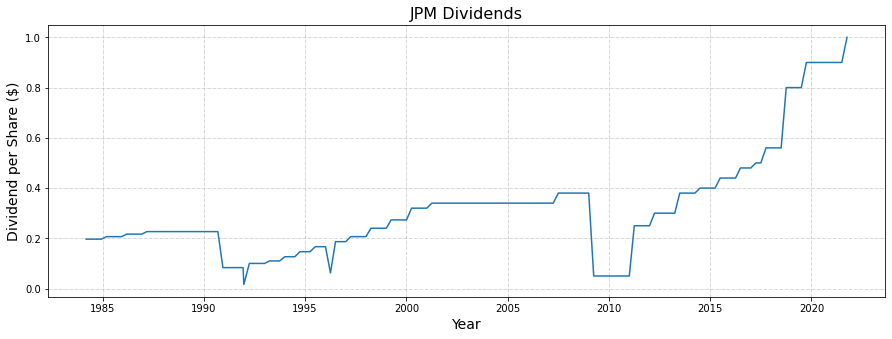

Date
2019-07-03    0.8
2019-10-03    0.9
2020-01-03    0.9
2020-04-03    0.9
2020-07-02    0.9
2020-10-05    0.9
2021-01-05    0.9
2021-04-05    0.9
2021-07-02    0.9
2021-10-05    1.0
Name: Dividends, dtype: float64


In [80]:
tickdata = yf.Ticker(selected_ticker)

plt.title("%s Dividends" %selected_ticker, fontsize = 16)
plt.ylabel("Dividend per Share ($)", fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.grid(which = 'major', linestyle = '-.', linewidth = 0.5)
plt.plot(tickdata.dividends.index,tickdata.dividends)
plt.show()

print(tickdata.dividends.tail(10))

             Revenue     Earnings
Quarter                          
4Q2020   31113000000  12136000000
1Q2021   36422000000  14300000000
2Q2021   32764000000  11948000000
3Q2021   31174000000  11687000000


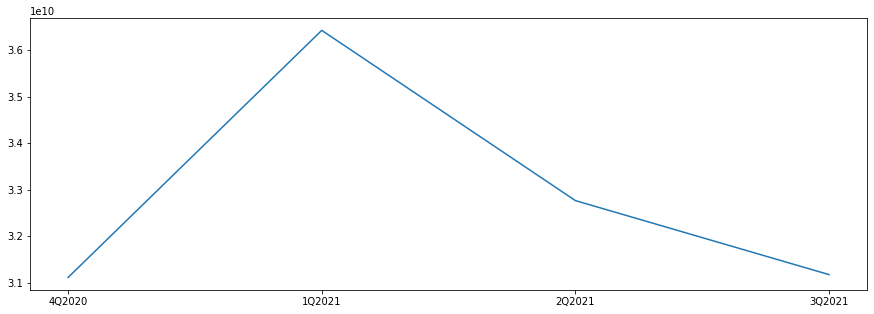

In [81]:
plt.plot(tickdata.quarterly_earnings.index,tickdata.quarterly_earnings['Revenue'])

print(tickdata.quarterly_earnings)

In [82]:
tickdata.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,16.35
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False
